In [47]:
plot_date='Feb9'






import matplotlib.pyplot as pl
import xarray as xr
import numpy as np
from datetime import datetime, timedelta

if plot_date=='Feb2':
    SAM=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb2/EUREC4A_2Feb_1024sqx151_150m_SAM_NC400_km.nc',decode_times=True)
    MHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/eurec4a_Feb2_1024_150m_8kmtop_nonudge_01d.nc',decode_times=True)
    MHH_w=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/eurec4a_Feb2_1024_150m_8kmtop_nonudge_01d.nc',decode_times=True)
    MHH_eulerian=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/eurec4a_Feb2_1024_200m_8kmtop_nonudge_400e6_eulerian_01d.nc',decode_times=True)
    ERA5=xr.open_dataset('/fs/ess/PFS0220/eurec4a/forcings/eurec4a_20200202_narenpitak_extended.kpt_inversion.nc',decode_times=True)
    CERES=xr.open_dataset('/users/PFS0220/pblossey/CERES_Lagtraj_2Feb_2deg_ECMWF_CSU_WithObs.nc',decode_times=True)
    DALES=xr.open_dataset('/fs/ess/PFS0220/eurec4a/Intercomparison_Results/Dales_Results/tmser.Feb2.001.nc',decode_times=True)
    DALES1=xr.open_dataset('/fs/ess/PFS0220/eurec4a/Intercomparison_Results/Dales_Results/profiles.Feb2.001.nc',decode_times=True)
    MONC=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200202_diagnostic_0+1d.nc',decode_times=True)
    SAM_NOAA=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001.hera.2023-12-23-01h08m58s/OUT_STAT/NOAA_SAM_EUREC4A_2020-02-02_1024sqx151_150m_FY2M_RRTM_NA478.001_eurec4a_20200202.kpt.DEPHY.nc',decode_times=True)
elif plot_date=='Feb9':
    SAM=xr.open_dataset('/fs/ess/PFS0220/eurec4a/SAM_UW_results/Feb9/EUREC4A_9Feb_1024sqx151_150m_SAM_NC400_km.nc',decode_times=True)
    MHH=xr.open_dataset('/fs/ess/PFS0220/eurec4a/microhh_results/eurec4a_Feb9_512_150m_12kmtop_nonudge_250e6_01d.nc',decode_times=True)
    ERA5=xr.open_dataset('/fs/ess/PFS0220/eurec4a/forcings/eurec4a_20200209.kpt.nc',decode_times=True)
    MONC=xr.open_dataset('/fs/ess/PFS0220/eurec4a/MONC_results/d20200209_diagnostic_0+1d.nc',decode_times=True)
    CERES=xr.open_dataset('/users/PFS0220/pblossey/CERES_Lagtraj_9Feb_2deg_ECMWF_CSU_WithObs.nc',decode_times=True)
    SAM_NOAA=xr.open_dataset('//fs/ess/PFS0220/eurec4a/SAM_NOAA_results/NOAA_SAM_EUREC4A_2020-02-09_1024sqx151_150m_FY2M_RRTM_NA471.001.hera.2023-12-24-20h09m55s/OUT_STAT/NOAA_SAM_EUREC4A_2020-02-09_1024sqx151_150m_FY2M_RRTM_NA471.001_eurec4a_20200209.kpt.DEPHY.nc',decode_times=True)
    DALES=xr.open_dataset('/fs/ess/PFS0220/eurec4a/Intercomparison_Results/Dales_Results/tmser.Feb9.001.nc',decode_times=True)
    DALES1=xr.open_dataset('/fs/ess/PFS0220/eurec4a/Intercomparison_Results/Dales_Results/profiles.Feb9.001.nc',decode_times=True)


pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

new_coords = xr.DataArray(SAM['zf'].values, dims='height')
SAM=SAM.assign_coords({'height':new_coords})
new_coords = xr.DataArray(SAM_NOAA['zf'].values, dims='height')
SAM_NOAA=SAM_NOAA.assign_coords({'height':new_coords})
if plot_date=='Feb2':
    new_coords = xr.DataArray(ERA5['height_f'].isel(time=0).values, dims='nlev')
else:
    new_coords = xr.DataArray(ERA5['zf'].isel(time=0).values, dims='nlev')
ERA5=ERA5.assign_coords({'nlev':new_coords})


In [2]:
DALES1['time'].attrs['units'] = 's since 2020-02-06 00:00:00'
DALES1['time'].attrs['calendar'] = 'proleptic_gregorian'
DALES1['time'].attrs['axis'] = 'T'
#write out to netcdf file
DALES1.to_netcdf('/fs/ess/PFS0220/eurec4a/Intercomparison_Results/Dales_Results/profiles.Feb9.001.nc')

DALES['time'].attrs['units'] = 's since 2020-02-06 00:00:00'
DALES['time'].attrs['calendar'] = 'proleptic_gregorian'
DALES['time'].attrs['axis'] = 'T'
#write out to netcdf file
DALES.to_netcdf('/fs/ess/PFS0220/eurec4a/Intercomparison_Results/Dales_Results/tmser.Feb9.001.nc')

Text(0.5, 0.45, 'd)')

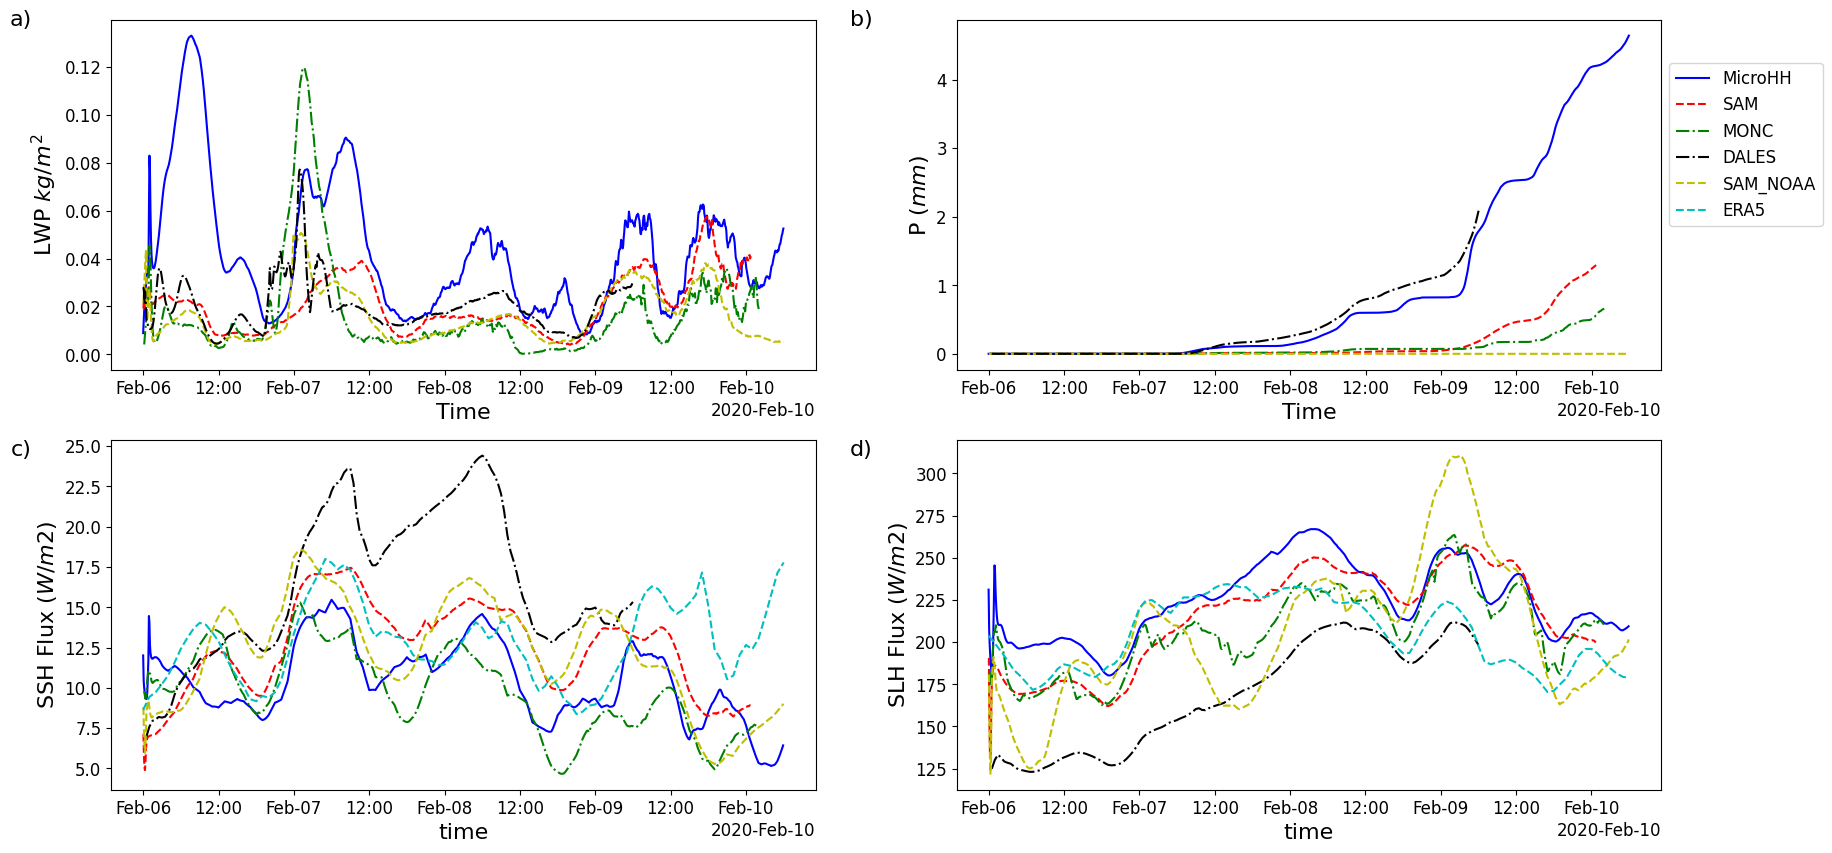

In [7]:
fig, axs = pl.subplots(2, 2, figsize=(20, 10))
pl.subplot(221)
MHH['lwp'].plot.line('b-',label='MicroHH')
SAM['lwp'].plot.line('r--',label='SAM')
MONC['LWP_mean'].plot.line('g-.',label='MONC')
SAM_NOAA['lwp'].plot.line('y--',label='SAM_NOAA')
DALES['lwp_bar'].plot.line('k-.',label='DALES')
pl.ylabel(r'LWP $kg/m^2$')

pl.subplot(222)
(MHH['pr']*300).cumsum().plot.line('b-',label='MicroHH')
(SAM['pr']*300).cumsum().plot.line('r--',label='SAM')
(MONC['surface_precip_mean']*300).cumsum().plot.line('g-.',label='MONC')
(SAM_NOAA['pr']*300).cumsum().plot.line('y--',label='SAM_NOAA')
(DALES1['precmn']*1800/86400).sel(zt=10).cumsum().plot.line('k-.',label='DALES')
pl.ylabel(r'P $(mm)$')
pl.title('')

pl.subplot(223)
MHH.hfss.plot.line('b-',label='MicroHH')
SAM['hfss'].plot.line('r--',label='SAM')
MONC['senhf_mean'].plot.line('g-.',label='MONC')
DALES1['hfss']=DALES1['rhof'].isel(zt=0)*1004*DALES1['wthls'].isel(zm=0)
DALES1['hfss'].plot.line('k-.',label='DALES')
SAM_NOAA['hfss'].plot.line('y--',label='SAM_NOAA')
(ERA5['sfc_sens_flx']*-1).plot.line('c--',label='ERA5')
pl.ylabel(r'SSH Flux $(W/m2)$')

pl.subplot(224)
MHH.hfls.plot.line('b-',label='MicroHH')
SAM['hfls'].plot.line('r--',label='SAM')
MONC['lathf_mean'].plot.line('g-.',label='MONC')
DALES1['hfls']=DALES1['rhof'].isel(zt=0)*DALES1['wqts'].isel(zm=0)*2500000
DALES1['hfls'].plot.line('k-.',label='DALES')
SAM_NOAA['hfls'].plot.line('y--',label='SAM_NOAA')
(ERA5['sfc_lat_flx']*-1).plot.line('c--',label='ERA5')
pl.ylabel(r'SLH Flux $(W/m2)$')

pl.legend(loc='upper left',bbox_to_anchor=(1, 2.1))
pl.figtext(0.08, 0.88, 'a)', ha='center', va='center', fontsize=16)
pl.figtext(0.08, 0.45, 'c)', ha='center', va='center', fontsize=16)
pl.figtext(0.5, 0.88, 'b)', ha='center', va='center', fontsize=16)
pl.figtext(0.5, 0.45, 'd)', ha='center', va='center', fontsize=16)


In [35]:
a=MHH.lon.isel(time=slice(48*12,None,12)).values
b=MHH.lat.isel(time=slice(48*12,None,12)).values

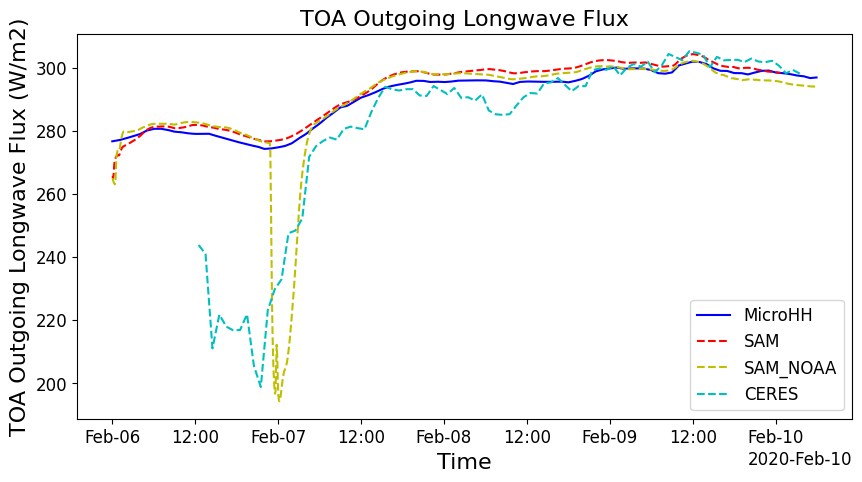

In [8]:

#### OLR #######
if plot_date=='Feb2':
    lead_time=0.5
    trail_time=24
else:
    lead_time=12.5;
    trail_time=0

pl.figure(figsize=(10, 5))
MHH['rlut'].isel(time=slice(None,None,1)).plot.line('b-',label='MicroHH')
SAM['rlut'].plot.line('r--',label='SAM')
SAM_NOAA['rlut'].plot.line('y--',label='SAM_NOAA')
MHH['ceres_rlut']=xr.DataArray(np.zeros(MHH['time'].size),dims=['time'])
MHH['ceres_rlut'].isel(time=slice(int(lead_time*12),int((lead_time+CERES['rlut'].size)*12),12)).values[:]=CERES['rlut'].values[trail_time:None]
MHH['ceres_rlut'].isel(time=slice(int(lead_time*12),int((lead_time+CERES['rlut'].size)*12),12)).plot.line('c--',label='CERES')   
pl.title('TOA Outgoing Longwave Flux')
pl.ylabel('TOA Outgoing Longwave Flux (W/m2)')
pl.legend()


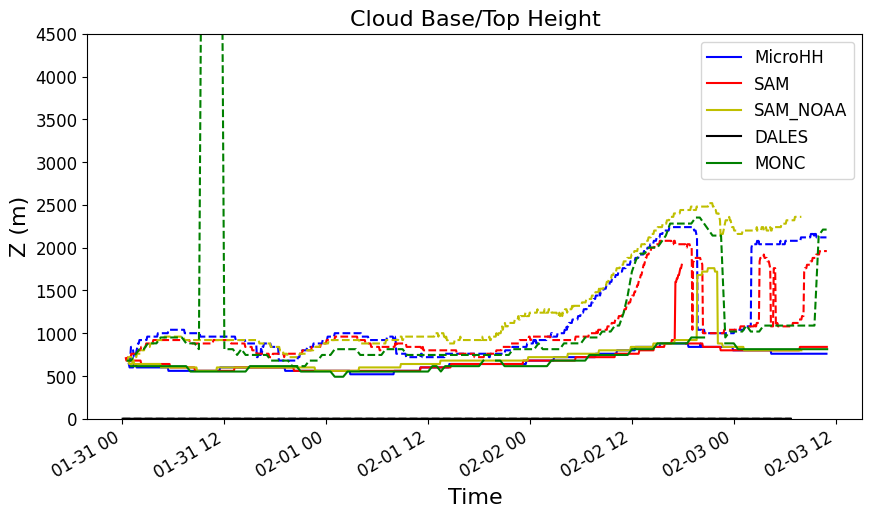

In [7]:
#### Cloud Base/Top Plot #######
def find_cloudbasetop(nc_data,z,cfrac,z_dim):
    nc_data['ql_base']=xr.DataArray(np.zeros(nc_data['time'].size),dims=['time'])
    nc_data['ql_top']=xr.DataArray(np.zeros(nc_data['time'].size),dims=['time'])
    for k in range(0,nc_data['time'].size):
        nc_data['ql_base'].values[k]=nc_data[z].where(nc_data[cfrac].isel(time=k)>0.01).min(dim=z_dim)
        nc_data['ql_top'].values[k]=nc_data[z].where(nc_data[cfrac].isel(time=k)>0.5*max(nc_data[cfrac].isel(time=k))).max(dim=z_dim)
    return nc_data;

MHH=find_cloudbasetop(MHH,'zf','flc','zf')
SAM=find_cloudbasetop(SAM,'zf','flc','height')
SAM_NOAA=find_cloudbasetop(SAM_NOAA,'zf','flc','height')
DALES=find_cloudbasetop(DALES,'zt','cfrac','zt')
MONC=find_cloudbasetop(MONC,'zn','total_cloud_fraction','zn')

pl.figure(figsize=(10, 5))
MHH['ql_base'].plot.line('b-',label='MicroHH')
MHH['ql_top'].plot.line('b--')
SAM['ql_base'].plot.line('r-',label='SAM')
SAM['ql_top'].plot.line('r--')
SAM_NOAA['ql_base'].plot.line('y-',label='SAM_NOAA')
SAM_NOAA['ql_top'].plot.line('y--')
if plot_date=='Feb2':
    DALES['ql_base'].plot.line('k-',label='DALES')
    DALES['ql_top'].plot.line('k--')
MONC['ql_base'].plot.line('g-',label='MONC')
MONC['ql_top'].plot.line('g--')
pl.ylim(0,4500)
pl.ylabel('Z (m)')
pl.title('Cloud Base/Top Height')
pl.legend()

/users/PFS0220/graghuna/.local/lib/python3.9/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


9 4 23
2020-02-09T05:30:00.000000000


Text(0.5, 0, 'RH')

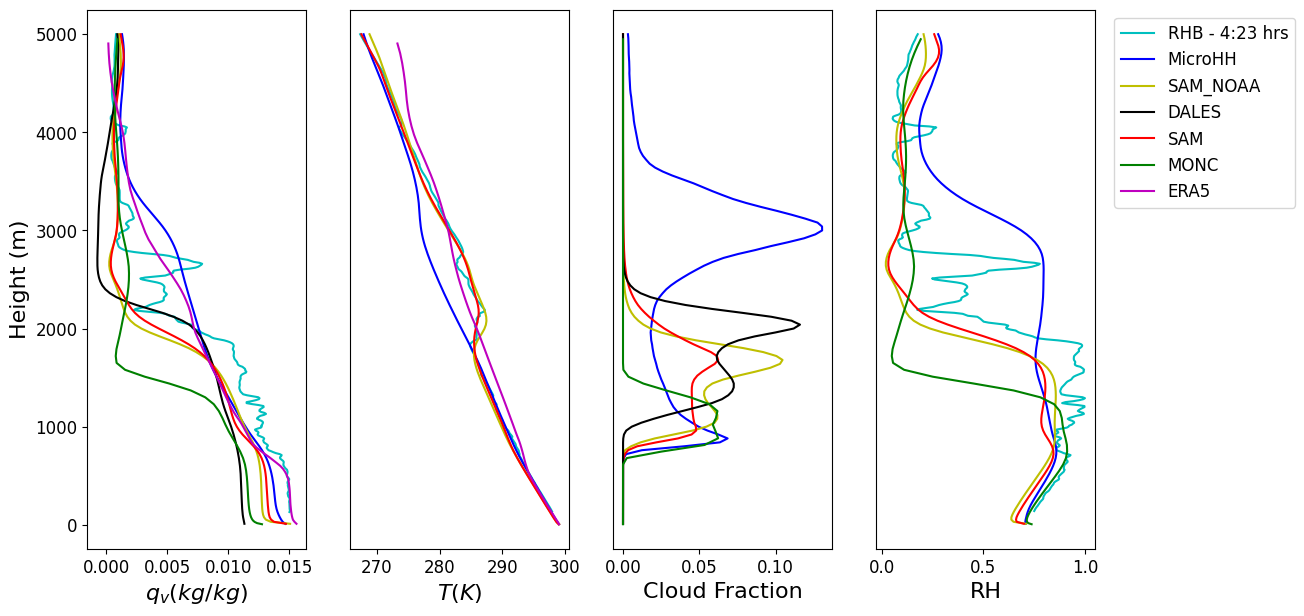

In [54]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/eurec4a/eurec4a-intake/master/catalog.yml")

SONDE = cat.radiosondes.ronbrown.to_dask()


plot_hour=48+29.5
sond_ind=285
slice_end=5000
print(SONDE.launch_time[sond_ind].dt.day.values,SONDE.launch_time[sond_ind].dt.hour.values,SONDE.launch_time[sond_ind].dt.minute.values)
print(MHH.time.isel(time=int(plot_hour*12)).values)


fig, axs = pl.subplots(1, 4, figsize=(13, 7))
ax = pl.subplot(141)
SONDE.sel(alt=slice(0,slice_end)).mr.isel(sounding=sond_ind).plot.line('c-',y='alt',\
        label=f'RHB - {SONDE.launch_time[sond_ind].dt.hour.values}:{SONDE.launch_time[sond_ind].dt.minute.values} hrs')
MHH.sel(zf=slice(0,slice_end)).qv.isel(time=int(plot_hour*3600/300)).plot.line('b-',y='zf',label='MicroHH')
SAM_NOAA.sel(height=slice(0,slice_end)).qv.isel(time=int(plot_hour*3600/300)).plot.line('y-',y='height',label='SAM_NOAA')
q=DALES1.sel(zt=slice(0,slice_end)).qt.isel(time=int(plot_hour*3600/1800))
(q/(1-q)).plot.line('k-',y='zt',label='DALES')
SAM.sel(height=slice(0,slice_end)).qv.isel(time=int(plot_hour*3600/300)).plot.line('r-',y='height',label='SAM')
MONC.sel(zn=slice(0,slice_end)).vapour_mmr_mean.isel(time=int(plot_hour*3600/1800)).plot.line('g-',y='zn',label='MONC')
ERA5.sel(nlev=slice(slice_end,0)).q.isel(time=int(plot_hour+24)).plot.line('m-',y='nlev',label='ERA5')

ax.set_title('')
ax.xaxis.set_major_formatter(pl.FormatStrFormatter('%.3f'))
ax.set_xlabel(r'$q_{v} (kg/kg)$')
ax.set_ylabel('Height (m)')
pl.legend(bbox_to_anchor=(4.65, 1), loc='upper left')

ax = pl.subplot(142)
SONDE.sel(alt=slice(0,slice_end)).ta.isel(sounding=sond_ind).plot.line('c-',y='alt',\
        label=f'RHB - {SONDE.launch_time[sond_ind].dt.hour.values}:{SONDE.launch_time[sond_ind].dt.minute.values} hrs')
MHH.sel(zf=slice(0,slice_end)).ta.isel(time=int(plot_hour*3600/300)).plot.line('b-',y='zf',label='MicroHH')
SAM_NOAA.sel(height=slice(0,slice_end)).ta.isel(time=int(plot_hour*3600/300)).plot.line('y-',y='height',label='SAM_NOAA')
SAM.sel(height=slice(0,slice_end)).ta.isel(time=int(plot_hour*3600/300)).plot.line('r-',y='height',label='SAM')
ERA5.sel(nlev=slice(slice_end,0)).t.isel(time=int(plot_hour+24)).plot.line('m-',y='nlev',label='ERA5')
ax.yaxis.set_ticks([])
ax.set_ylabel('')
ax.set_xlabel(r'$T (K)$')
ax.set_title('')

ax = pl.subplot(143)
MHH.sel(zf=slice(0,slice_end)).flc.isel(time=int(plot_hour*3600/300)).plot.line('b-',y='zf',label='MicroHH')
SAM_NOAA.sel(height=slice(0,slice_end)).flc.isel(time=int(plot_hour*3600/300)).plot.line('y-',y='height',label='SAM_NOAA')
SAM.sel(height=slice(0,slice_end)).flc.isel(time=int(plot_hour*3600/300)).plot.line('r-',y='height',label='SAM')
DALES1.sel(zt=slice(0,slice_end)).cfrac.isel(time=int(plot_hour*3600/1800)).plot.line('k-',y='zt',label='DALES')
MONC.sel(zn=slice(0,slice_end)).total_cloud_fraction.isel(time=int(plot_hour*3600/1800)).plot.line('g-',y='zn',label='MONC')
#ERA5.sel(nlev=slice(slice_end,0)).cloud_fraction.isel(time=int(plot_hour+24)).plot.line('m-',y='nlev',label='ERA5')
ax.yaxis.set_ticks([])
ax.set_ylabel('')
ax.set_title('')
ax.set_xlabel('Cloud Fraction')

ax = pl.subplot(144)
SONDE.sel(alt=slice(0,slice_end)).rh.isel(sounding=sond_ind).plot.line('c-',y='alt',\
        label=f'RHB - {SONDE.launch_time[sond_ind].dt.hour.values}:{SONDE.launch_time[sond_ind].dt.minute.values} hrs')
MHH.sel(zf=slice(0,slice_end)).hur.isel(time=int(plot_hour*3600/300)).plot.line('b-',y='zf',label='MicroHH')
((SAM_NOAA.sel(height=slice(0,slice_end)).hur.isel(time=int(plot_hour*3600/300)))/100).plot.line('y-',y='height',label='SAM_NOAA')
((SAM.sel(height=slice(0,slice_end)).hur.isel(time=int(plot_hour*3600/300)))/100).plot.line('r-',y='height',label='SAM')
#((DALES1.sel(zt=slice(0,slice_end)).rh.isel(time=int(plot_hour*3600/1800)))/100).plot.line('k-',y='zt',label='DALES')
((MONC.sel(zn=slice(0,slice_end)).rh_mean.isel(time=int(plot_hour*3600/1800)))).plot.line('g-',y='zn',label='MONC')
ax.yaxis.set_ticks([])
ax.set_ylabel('')
ax.set_title('')
ax.set_xlabel('RH')



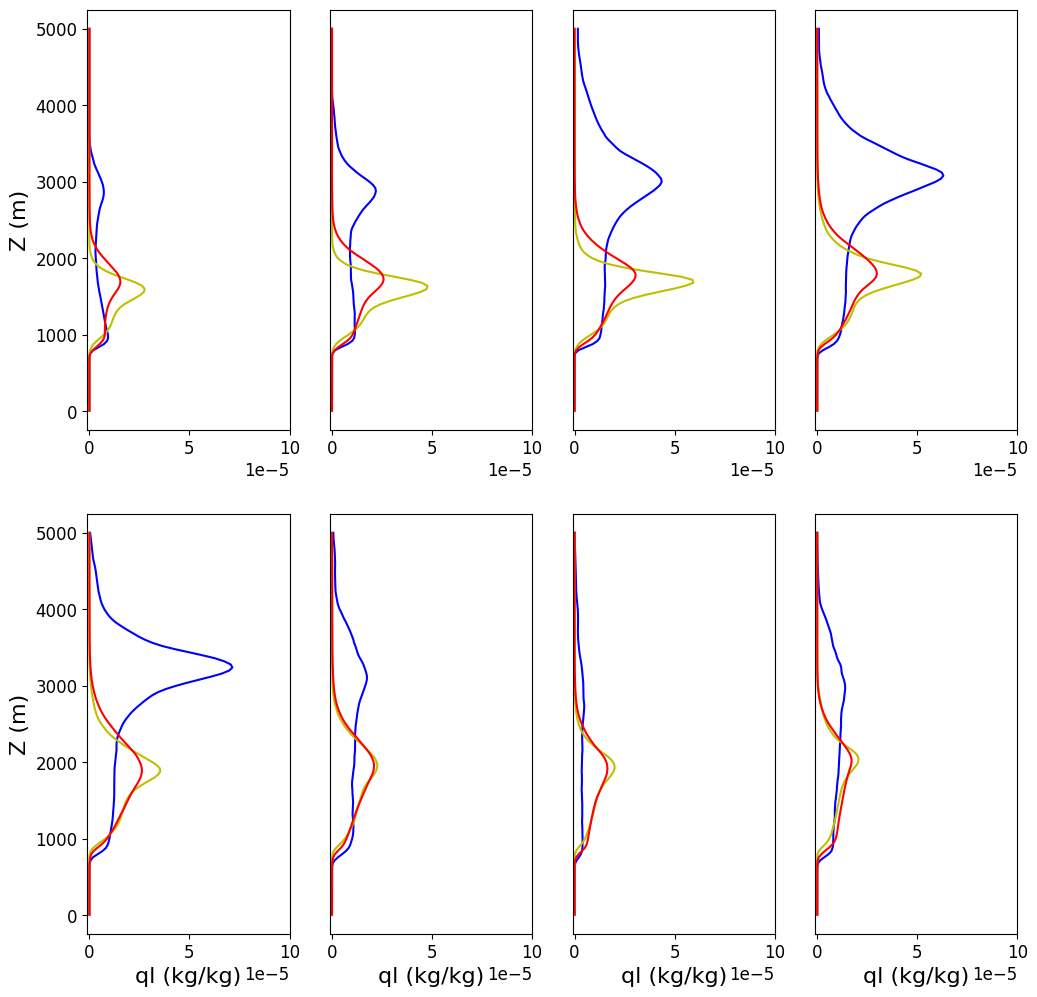

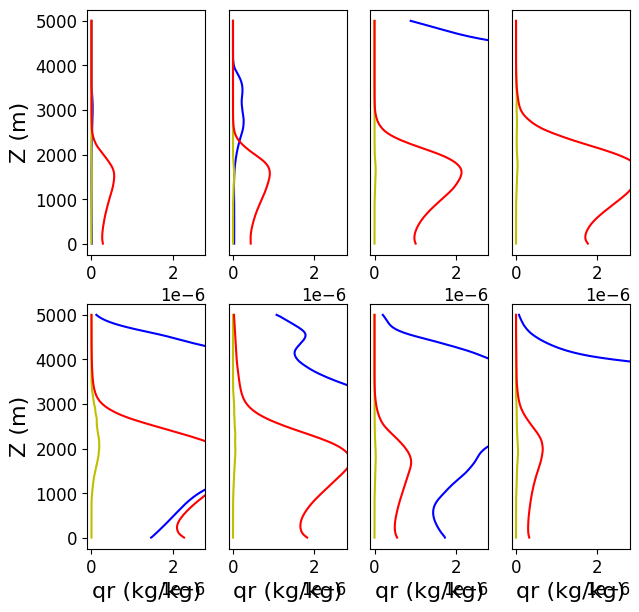

In [5]:
slice_end=5000
fig, axs = pl.subplots(2, 4, figsize=(12, 12))
plot_hour=72
for i in range(0,8):
    ax = pl.subplot(241+i)
    MHH.sel(zf=slice(0,slice_end)).qlc.isel(time=int((plot_hour+2*i)*3600/300)).plot.line('b-',y='zf',label='MicroHH')
    SAM_NOAA.sel(height=slice(0,slice_end)).qlc.isel(time=int((plot_hour+2*i)*3600/300)).plot.line('y-',y='height',label='SAM_NOAA')
    SAM.sel(height=slice(0,slice_end)).qlc.isel(time=int((plot_hour+2*i)*3600/300)).plot.line('r-',y='height',label='SAM')
    #ql=DALES1.sel(zt=slice(0,slice_end)).ql.isel(time=int((plot_hour+2*i)*3600/1800))
    #(ql/(1-ql)).plot.line('k-',y='zt',label='DALES')
    
    if i!=0 and i!=4:
        ax.set_ylabel('')
        ax.yaxis.set_ticks([])
    else:
        ax.set_ylabel('Z (m)')
    ax.set_title('')
    if i>3:
        ax.set_xlabel('ql (kg/kg)')
    else:
        ax.set_xlabel('')
    ax.set_xlim(-1e-6,0.0001)

fig, axs = pl.subplots(2, 4, figsize=(7, 7))
for i in range(0,8):
    ax = pl.subplot(241+i)
    MHH.sel(zf=slice(0,slice_end)).qlr.isel(time=int((plot_hour+2*i)*3600/300)).plot.line('b-',y='zf',label='MicroHH')
    SAM_NOAA.sel(height=slice(0,slice_end)).qlr.isel(time=int((plot_hour+2*i)*3600/300)).plot.line('y-',y='height',label='SAM_NOAA')
    SAM.sel(height=slice(0,slice_end)).qlr.isel(time=int((plot_hour+2*i)*3600/300)).plot.line('r-',y='height',label='SAM')
    
    if i!=0 and i!=4:
        ax.set_ylabel('')
        ax.yaxis.set_ticks([])
    else:
        ax.set_ylabel('Z (m)')
    ax.set_title('')
    if i>3:
        ax.set_xlabel('qr (kg/kg)')
    else:
        ax.set_xlabel('')
    ax.set_xlim(-1e-7,2.8e-6)